### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# ignore warnings
import warnings
warnings.simplefilter('ignore')

## 1. Reading data

In [3]:
appl_data = pd.read_csv('application_data.csv')
prev_data = pd.read_csv('previous_application.csv')

### Inspect the Dataframe

In [4]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
appl_data.shape

(307511, 122)

In [6]:
appl_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [7]:
pd.set_option('display.max_rows', appl_data.shape[1])
appl_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


## 2. Data Analysis

### 2.1 Identifying Missing Value columns

In [8]:
perc_missing = round(appl_data.isna().sum() / appl_data.shape[0], 2)

#number of columns with no missing values
perc_missing[perc_missing == 0].size

65

In [9]:
#number of columns with missing values
perc_missing[perc_missing != 0].size

57

In [10]:
perc_missing

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                     0.66
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [11]:
perc_missing.describe()

count    122.000000
mean       0.243607
std        0.283945
min        0.000000
25%        0.000000
50%        0.000000
75%        0.510000
max        0.700000
dtype: float64

In [12]:
#referring to business context information from the columns_description,
#the following columns are decided to be not relevant.

#the columns "FLAG_DOCUMENT_*" tells which document are submited.
#The potential defaulter is about loan applicants with approved loans
#Considering the document type not given in the dataset,
#the relevancy of the document supplied/not supplied cannot be assimilated.
#this implies, the causality cannot be stated.
drop_cols = list(perc_missing.filter(regex='FLAG_DOCUMENT_').index)
drop_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [13]:
#considering if the column has more than 50% of the values missing,
#the column data mostly likely:
#will not be representing the population behaviour regardless of its business significance.

#analysing columns with more than 1/2 the values missing
perc_missing[perc_missing > 0.5].index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE'],
      dtype='object')

In [14]:
#thus these columns can be dropped.
drop_cols = drop_cols + list(perc_missing[perc_missing >= 0.5].index)

In [15]:
#analysing the columns that have missing values between 30% and 50%,
cols_30_to_50 = perc_missing[(perc_missing > 0.3) & (perc_missing < 0.5)]
cols_30_to_50

OCCUPATION_TYPE                 0.31
YEARS_BEGINEXPLUATATION_AVG     0.49
YEARS_BEGINEXPLUATATION_MODE    0.49
YEARS_BEGINEXPLUATATION_MEDI    0.49
TOTALAREA_MODE                  0.48
EMERGENCYSTATE_MODE             0.47
dtype: float64

In [16]:
#referring to business context information from the columns_description.csv,
#the columns which ends with "*_AVG", "*_MEDI", "*_MODE" describes the building where the applicants live in.
#almost all the columns pertaining to this information are
#already dropped as they do not have significant representatives
#this situation potentially renders these columns containing only partial reprenstation
#also, their missing values is also more than 40%
#thus, rendering them more or less with the same low reprentation on any potential causuality 
#as the rest of the values in the same categories.
#implies, these cane be safely considered non players and can thus be dropped.

drop_cols = drop_cols\
                + list(cols_30_to_50.filter(regex='_AVG$').index)\
                + list(cols_30_to_50.filter(regex='_MEDI$').index)\
                + list(cols_30_to_50.filter(regex='_MODE$').index)
len(drop_cols)

69

#### Column "OCCUPATION_TYPE":

- though this column has 31% missing values,
- considering we still have more than two-thirds of the population represented
- additionally referring to business context information from the columns_description,
- this columns finds a significant place representing the business context

Thus, **we will retain this colum** and consider the fact that 31% of the rows are missing during the categorical treatment of this variable.

In [17]:
req_cols = [col for col in list(perc_missing.index) if col not in drop_cols] 
req_cols

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

### 2.2 Removing Unwanted columns

In [18]:
appl_data = appl_data.loc(axis=1)[appl_data.columns.isin(req_cols)]

In [19]:
appl_data.shape

(307511, 53)

In [20]:
appl_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [21]:
appl_data.columns[appl_data.isna().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

### 2.3 Missing values treatment

#### Column: NAME_TYPE_SUITE

In [22]:
appl_data['NAME_TYPE_SUITE'].unique()


array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [23]:
appl_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [24]:
mode = appl_data['NAME_TYPE_SUITE'].mode()
mode

0    Unaccompanied
dtype: object

In [25]:
#NAME_TYPE_SUITE
#Assuming that the applicants with missing values for this column came alone
appl_data['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

In [26]:
#referring to business context information from the columns_description,
#this is not dropped for now
#appl_data_eda.drop('NAME_TYPE_SUITE',inplace=True,axis=1)

#### Column: OCCUPATION_TYPE

In [27]:
mode = appl_data['OCCUPATION_TYPE'].mode()
mode

0    Laborers
dtype: object

In [28]:
appl_data['OCCUPATION_TYPE'].isna().sum()

96391

We are already aware that this has 31% for records with missing values.<br>
We decided to keep the column treating this as a possible business case,<br>
We wil consider this as a category in itself, giving it a name as **'Unknown'**

In [29]:
impute_value = 'Unknown'

appl_data['OCCUPATION_TYPE'].fillna(impute_value, inplace=True)

#### Column: CNT_FAM_MEMBERS

In [30]:
appl_data['CNT_FAM_MEMBERS'].isna().sum()

2

In [31]:
appl_data[appl_data['CNT_FAM_MEMBERS'].isna()]['CNT_FAM_MEMBERS']

41982    NaN
187348   NaN
Name: CNT_FAM_MEMBERS, dtype: float64

In [32]:
mode = appl_data['CNT_FAM_MEMBERS'].mode()
mode

0    2.0
dtype: float64

In [33]:
#imputing mode for #CNT_FAM_MEMBERS
#Assuming that the applicants with missing values for this column alone
appl_data.loc[appl_data['CNT_FAM_MEMBERS'].isna(), 'CNT_FAM_MEMBERS'] = 2.0

In [34]:
#imputed. so no null values anymore.
appl_data['CNT_FAM_MEMBERS'].isna().sum()

0

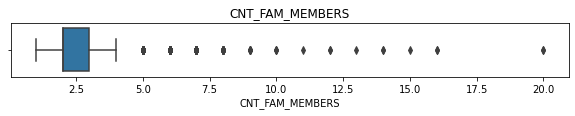

In [35]:
plt.figure(figsize=(10, 1))
sns.boxplot(appl_data['CNT_FAM_MEMBERS']).set_title('CNT_FAM_MEMBERS')
plt.show()

In [36]:
#We can observe that the number of outliers are low

In [37]:
appl_data.columns[appl_data.isna().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

#### Column: 'AMT_ANNUITY'

In [38]:
no_rows = appl_data['AMT_ANNUITY'].isna().sum()
no_rows

12

We can note that the number of values here is very less.<br>
Annuity being a major contributing factor based the business context from **column_description.csv** data,<br>
imputing this value could bias the result. Considering we have large number of rows in comparision with this,<br>
we can **drop** these rows

In [39]:
appl_data = appl_data.loc[~appl_data['AMT_ANNUITY'].isna()]

In [40]:
no_rows_dropped = no_rows
no_rows_dropped

12

In [41]:
#imputed. so no null values anymore.
appl_data['AMT_ANNUITY'].isna().sum()

0

#### Column: AMT_GOODS_PRICE

 is dependant on loan type being consumer goods.
The loan type column relevant to this is 'NAME_CONTRACT_TYPE'.
If the NAME_CONTRACT_TYPE is Consumer Loan, then this the price of the consumer item being purchased by the client using this loan.

In [42]:

appl_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278220
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

We observe that we have no records with us which has the relevant NAME_CONTRACT_TYPE<br>
This implies this value **cannot be imputed**

In [43]:
appl_data['AMT_GOODS_PRICE'].isna().sum()

278

In [44]:
appl_data.loc[appl_data['AMT_GOODS_PRICE'].isna()]['NAME_CONTRACT_TYPE'].value_counts()

Revolving loans    278
Name: NAME_CONTRACT_TYPE, dtype: int64

We observe that all the records with AMT_GOODS_PRICE as NaN are  __*Revolving loans*__<br>
and hence they **do not have an AMT_GOODS_PRICE** associated with it.<br>
Thus, these values can be safely __*imputed with '0'*__ based on the business context.

In [45]:
appl_data.loc[appl_data['AMT_GOODS_PRICE'].isna(), 'AMT_GOODS_PRICE'] = 0.0

In [46]:
appl_data['AMT_GOODS_PRICE'].isna().sum()
#imputed. Thus no more NaNs

0

In [47]:
appl_data.columns[appl_data.isna().any()]

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

#### Columns: EXT_SOURCE_2

Based on the information from the **column_description**,<br>
EXT_SOURCE_2 is a "Normalized Score" that are sourced from an external data source.
Considering this, EXT_SOURCE_2 could potentially be significant for business and hence imputing them might not be advicable.

In [48]:
no_rows = appl_data['EXT_SOURCE_2'].isna().sum()
no_rows

660

In [49]:
appl_data.shape

(307499, 53)

In [50]:
#no_rows_dropped has the number of rows dropped already.

In [51]:
no_rows + no_rows_dropped

672

Consider, the no_rows_dropped, together with the no_rows with EXT_SOURCE_2 is NaN,<br>
is **significantly less than the total no. of records**,<br>
we can **safely drop** this values to avoid skewing the result.

In [52]:
appl_data = appl_data.loc[~appl_data['EXT_SOURCE_2'].isna()]

In [53]:
appl_data['EXT_SOURCE_2'].isna().sum()
#rows are dropped. hence, no more NaNs

0

In [54]:
no_rows_dropped = no_rows_dropped + no_rows
no_rows_dropped

672


#### Columns: EXT_SOURCE_3

Based on the information from the **column_description**,<br>
EXT_SOURCE_3 is a "Normalized Score" that are sourced from an external data source.
Considering this, EXT_SOURCE_3 could potentially be significant for business<br>
and hence imputing them might not be advisable.

We have to analyse the data before decision

In [55]:

no_rows = appl_data['EXT_SOURCE_3'].isna().sum() 
no_rows

60734

In [56]:
round(no_rows/appl_data.shape[0], 3)

0.198

This is a considerable percentage.<br>
Being a 'Score' from an external source, with no further business information,<br>
we __*must consider dropping*__ these rows.<br>

In [57]:
mean = appl_data['EXT_SOURCE_3'].mean()
mean

0.5107773158925729

In [58]:

mode = appl_data['EXT_SOURCE_3'].mode()
mode


0    0.7463
dtype: float64

In [59]:
median = round(appl_data['EXT_SOURCE_3'].median(), 6)
median

0.535276

In [60]:
es3_data =  appl_data.loc[~appl_data['EXT_SOURCE_3'].isna()] 

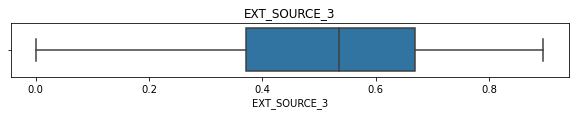

In [61]:
plt.figure(figsize=(10, 1))
sns.boxplot(appl_data['EXT_SOURCE_3']).set_title('EXT_SOURCE_3')
plt.show()


In [62]:
es3_data['EXT_SOURCE_3'].describe()

count    246105.000000
mean          0.510777
std           0.194854
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

The above implies the available score are fairly distributed without any outliers.<br>
We can also observe the percentage of missing values is higher than the standard deviation of the rest of the values.<br>

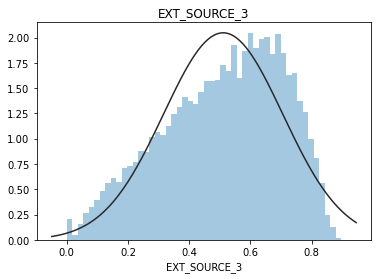

In [63]:
from scipy.stats import norm

sns.distplot(appl_data['EXT_SOURCE_3'], fit=norm, kde=False).set_title('EXT_SOURCE_3')
plt.show()

Considering these results, we will refrain from imputing this value<br>
When involving this variable for analysis, depending on the co-relation,<br>
we can analyse __*without the missing value rows for the related variables*__ as well.

In [64]:
appl_data.columns[appl_data.isna().any()]

Index(['EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

####  Columns:  Observation of Defaulters and Overdue Payments in the region
 - OBS_30_CNT_SOCIAL_CIRCLE
 - DEF_30_CNT_SOCIAL_CIRCLE
 - OBS_60_CNT_SOCIAL_CIRCLE
 - DEF_60_CNT_SOCIAL_CIRCLE

In [65]:
no_rows = appl_data['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()
no_rows

1017

In [66]:
SK_ID_CURRs = appl_data.loc[appl_data['OBS_30_CNT_SOCIAL_CIRCLE'].isna()]['SK_ID_CURR']
SK_ID_CURRs

68        100080
394       100457
397       100460
457       100527
1042      101209
           ...  
305526    453980
305623    454093
305641    454116
305642    454117
307402    456135
Name: SK_ID_CURR, Length: 1017, dtype: int64

In [67]:
appl_data['DEF_30_CNT_SOCIAL_CIRCLE'].isna().sum()

1017

In [68]:
appl_data.loc[appl_data['DEF_30_CNT_SOCIAL_CIRCLE'].isna()]['SK_ID_CURR'].isin(SK_ID_CURRs).sum()

1017

In [69]:
appl_data['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum()

1017

In [70]:
appl_data.loc[appl_data['OBS_60_CNT_SOCIAL_CIRCLE'].isna()]['SK_ID_CURR'].isin(SK_ID_CURRs).sum()

1017

In [71]:
appl_data['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum()

1017

In [72]:
appl_data.loc[appl_data['DEF_60_CNT_SOCIAL_CIRCLE'].isna()]['SK_ID_CURR'].isin(SK_ID_CURRs).sum()

1017

In [73]:
appl_data.shape

(306839, 53)

In [74]:
no_rows_dropped + no_rows

1689

In [75]:

round((no_rows_dropped + no_rows)/appl_data.shape[0],3)

0.006

 - We observe that the records are __*missing for the same set of applicants*__
 
 - Considering the total number of records dropped sofar<br>
   and the number of rows in these columns with missing values,<br>
 
 The number of dropped records is significantly low and __*can be dropped*__.

In [76]:
appl_data = appl_data.loc[~appl_data['SK_ID_CURR'].isin(SK_ID_CURRs)]

In [77]:

no_rows_dropped = no_rows_dropped + no_rows
no_rows_dropped

1689

In [78]:
appl_data['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()
#the records are dropped. so no more missing values

0

In [79]:
appl_data.columns[appl_data.isna().any()]

Index(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


 #### Columns: Number of enquiries to Credit Bureau about the client
 - 'AMT_REQ_CREDIT_BUREAU_HOUR'
 - 'AMT_REQ_CREDIT_BUREAU_DAY'
 - 'AMT_REQ_CREDIT_BUREAU_WEEK'
 - 'AMT_REQ_CREDIT_BUREAU_MON'
 - 'AMT_REQ_CREDIT_BUREAU_QRT'
 - 'AMT_REQ_CREDIT_BUREAU_YEAR'

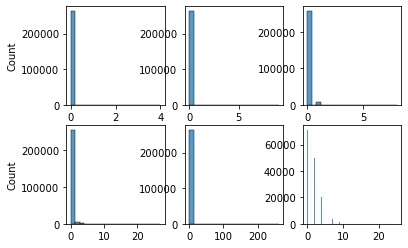

<Figure size 72x432 with 0 Axes>

In [80]:
f, axes = plt.subplots(2, 3)
plt.figure(figsize=(1, 6))
s = sns.histplot(data=appl_data, x='AMT_REQ_CREDIT_BUREAU_HOUR', ax=axes[0][0])
s.set(xlabel=None)

s = sns.histplot(data=appl_data, x='AMT_REQ_CREDIT_BUREAU_DAY', ax=axes[0][1])
s.set(xlabel=None)
s.set(ylabel=None)

s = sns.histplot(data=appl_data, x='AMT_REQ_CREDIT_BUREAU_WEEK', ax=axes[0][2])
s.set(xlabel=None)
s.set(ylabel=None)

s = sns.histplot(data=appl_data, x='AMT_REQ_CREDIT_BUREAU_MON', ax=axes[1][0])
s.set(xlabel=None)

s = sns.histplot(data=appl_data, x='AMT_REQ_CREDIT_BUREAU_QRT', ax=axes[1][1])
s.set(xlabel=None)
s.set(ylabel=None)

s = sns.histplot(data=appl_data, x='AMT_REQ_CREDIT_BUREAU_YEAR', ax=axes[1][2])
s.set(xlabel=None)
s.set(ylabel=None)

plt.show()

We observe that all these columns are mostly indicate that '0' requests are made to the credit bureau.
Rest of the values are very less significant.
The result is biased for the business reason that these values are this making any form or imputation unreliable.

Hence we can considering dropping these columns.

In [81]:

drop_cols = appl_data.filter(regex='AMT_REQ_CREDIT_BUREAU', axis=1).columns

In [82]:
#Dropping the above columns
appl_data.drop(drop_cols,axis=1,inplace=True)



In [83]:
appl_data.columns[appl_data.isna().any()]

Index(['EXT_SOURCE_3'], dtype='object')

### 2.4 Data Preparation for Numerical Data Analysis

In [84]:
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305822 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305822 non-null  int64  
 1   TARGET                       305822 non-null  int64  
 2   NAME_CONTRACT_TYPE           305822 non-null  object 
 3   CODE_GENDER                  305822 non-null  object 
 4   FLAG_OWN_CAR                 305822 non-null  object 
 5   FLAG_OWN_REALTY              305822 non-null  object 
 6   CNT_CHILDREN                 305822 non-null  int64  
 7   AMT_INCOME_TOTAL             305822 non-null  float64
 8   AMT_CREDIT                   305822 non-null  float64
 9   AMT_ANNUITY                  305822 non-null  float64
 10  AMT_GOODS_PRICE              305822 non-null  float64
 11  NAME_TYPE_SUITE              305822 non-null  object 
 12  NAME_INCOME_TYPE             305822 non-null  object 
 13 

In [85]:
days_cols = appl_data.filter(regex='DAYS_', axis=1).columns
days_cols

Index(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [86]:
appl_data[[days_cols[0]]]

,DAYS_BIRTH
0,-9461
1,-16765
2,-19046
3,-19005
4,-19932
...,...
307506,-9327
307507,-20775
307508,-14966
307509,-11961


In [87]:
#DAYS_BIRTH is the Client's age in days at the time of application
#convert DAYS_BIRTH to AGE
appl_data['AGE'] = -round(appl_data['DAYS_BIRTH']/365,0)
appl_data['AGE']

0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    46.0
Name: AGE, Length: 305822, dtype: float64

In [88]:
#DAYS_EMPLOYED
#How many days before the application the person started current employment
#convert DAYS_EMPLOYED to YEARS_EMPLOYED
appl_data['YEARS_EMPLOYED'] = abs(round(appl_data['DAYS_EMPLOYED']/365, 0))

#DAYS_REGISTRATION
#How many days before the application did client change his registration
#convert DAYS_REGISTRATION to YEARS_REGISTRATION
appl_data['YEARS_REGISTRATION'] = abs(round(appl_data['DAYS_REGISTRATION']/365, 0))

#DAYS_ID_PUBLISH
#How many days before the application did client change the identity document with which he applied for the loan
#convert DAYS_ID_PUBLISH to YEARS_ID_PUBLISH
appl_data['YEARS_ID_PUBLISH'] = abs(round(appl_data['DAYS_ID_PUBLISH']/365, 0))

#DAYS_ID_PUBLISH
#How many days before the application did client change the identity document with which he applied for the loan
#convert DAYS_LAST_PHONE_CHANGE to YEARS_LAST_PHONE_CHANGE
appl_data['YEARS_LAST_PHONE_CHANGE'] = abs(round(appl_data['DAYS_LAST_PHONE_CHANGE']/365, 0))

In [89]:
appl_data[['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE']]

,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,26.0,2.0,10.0,6.0,3.0
1,46.0,3.0,3.0,1.0,2.0
2,52.0,1.0,12.0,7.0,2.0
3,52.0,8.0,27.0,7.0,2.0
4,55.0,8.0,12.0,9.0,3.0
...,...,...,...,...,...
307506,26.0,1.0,23.0,5.0,1.0
307507,57.0,1001.0,12.0,11.0,0.0
307508,41.0,22.0,18.0,14.0,5.0
307509,33.0,13.0,7.0,3.0,1.0


In [90]:
## Drop all the days colns as we have converted them to years for computation
appl_data.drop(days_cols,axis=1,inplace=True)

In [91]:
appl_data[['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE']]

,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,26.0,2.0,10.0,6.0,3.0
1,46.0,3.0,3.0,1.0,2.0
2,52.0,1.0,12.0,7.0,2.0
3,52.0,8.0,27.0,7.0,2.0
4,55.0,8.0,12.0,9.0,3.0
...,...,...,...,...,...
307506,26.0,1.0,23.0,5.0,1.0
307507,57.0,1001.0,12.0,11.0,0.0
307508,41.0,22.0,18.0,14.0,5.0
307509,33.0,13.0,7.0,3.0,1.0


### 2.5 Binning required columns

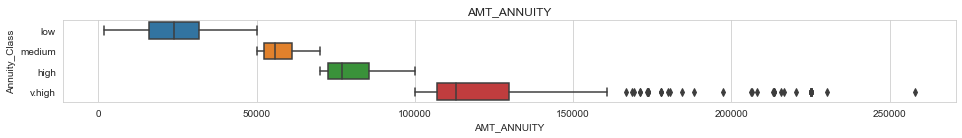

In [92]:
## Binning for Annuity and AMT_INCOME_TOTAL
appl_data['Annuity_Class'] = pd.cut(appl_data['AMT_ANNUITY'],\
                                       bins=[0,50000,70000,100000,260000],\
                                       labels=['low','medium','high','v.high'])

plt.figure(figsize=(16, 1.5))
sns.set_style("whitegrid")
sns.boxplot(data=appl_data, x='AMT_ANNUITY', y='Annuity_Class').set_title('AMT_ANNUITY')
plt.show()

In [93]:
appl_data['Annuity_Class'].value_counts()

low       284653
medium     18096
high        2571
v.high       502
Name: Annuity_Class, dtype: int64

In [94]:
appl_data.shape

(305822, 48)

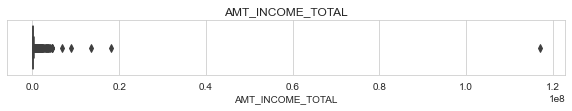

In [95]:
appl_data['AMT_INCOME_TOTAL'].describe()
plt.figure(figsize=(10, 1))
sns.boxplot(appl_data['AMT_INCOME_TOTAL']).set_title('AMT_INCOME_TOTAL')
plt.show()

In [96]:
##The above record is having a very high income value and is biasing the other records.
##Dropping this outlier

In [97]:
## Removing the outlier
appl_data = appl_data.sort_values(by=['AMT_INCOME_TOTAL'],ascending=False)[1:]

In [98]:
mean = appl_data['AMT_INCOME_TOTAL'].mean()
mean

168297.0670391667

In [99]:
appl_data.loc[appl_data['AMT_INCOME_TOTAL'] > mean].shape

(119728, 48)

In [100]:
 appl_data['AMT_INCOME_TOTAL'].max()

18000090.0

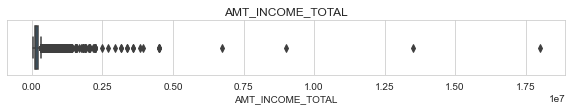

In [101]:
plt.figure(figsize=(10, 1))
sns.boxplot(appl_data['AMT_INCOME_TOTAL']).set_title('AMT_INCOME_TOTAL')
plt.show()

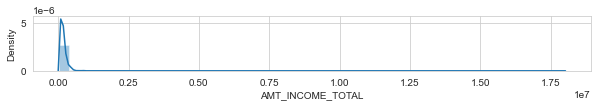

In [102]:
plt.figure(figsize=(10, 1))
sns.distplot(appl_data['AMT_INCOME_TOTAL'])
plt.show()

In [103]:
appl_data['Income_Class'] = pd.qcut(appl_data['AMT_INCOME_TOTAL'],\
                                       q=10, precision=2)

In [104]:
appl_income_grps = appl_data.groupby(by='Income_Class')['AMT_INCOME_TOTAL'].describe()
appl_income_grps

,count,mean,std,min,25%,50%,75%,max
Income_Class,,,,,,,,
"(25649.99, 81000.0]",33211.0,66246.127214,12096.275507,25650.0,58500.00,67500.0,76500.0,81000.00
"(81000.0, 99000.0]",30101.0,91088.792065,3401.030365,81180.0,90000.00,90000.0,90000.0,99000.00
"(99000.0, 112500.0]",36694.0,111332.451613,2844.519397,99031.5,112500.00,112500.0,112500.0,112500.00
"(112500.0, 135000.0]",48598.0,131847.429542,5660.457554,112549.5,130500.00,135000.0,135000.0,135000.00
"(135000.0, 146771.91]",4307.0,142941.286222,2050.488281,135256.5,143696.25,144000.0,144000.0,146771.91
"(146771.91, 162000.0]",30991.0,157136.798700,2411.856114,146812.5,157500.00,157500.0,157500.0,162000.00
"(162000.0, 180000.0]",30560.0,178058.020524,4199.414450,162279.0,180000.00,180000.0,180000.0,180000.00
"(180000.0, 225000.0]",44577.0,212716.093524,12450.582865,180090.0,202500.00,216000.0,225000.0,225000.00
"(225000.0, 270000.0]",19845.0,259479.343959,12473.345567,225112.5,247500.00,270000.0,270000.0,270000.00


In [105]:
income_levels_iv = appl_income_grps.index
list(income_levels_iv)

[Interval(25649.99, 81000.0, closed='right'),
 Interval(81000.0, 99000.0, closed='right'),
 Interval(99000.0, 112500.0, closed='right'),
 Interval(112500.0, 135000.0, closed='right'),
 Interval(135000.0, 146771.91, closed='right'),
 Interval(146771.91, 162000.0, closed='right'),
 Interval(162000.0, 180000.0, closed='right'),
 Interval(180000.0, 225000.0, closed='right'),
 Interval(225000.0, 270000.0, closed='right'),
 Interval(270000.0, 18000090.0, closed='right')]

In [106]:
appl_data['NAME_INCOME_TYPE'].value_counts()

Working                 157982
Commercial associate     71154
Pensioner                55038
State servant            21595
Unemployed                  19
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [107]:
appl_data['INCOME_TYPE']=''
appl_data['INCOME_TYPE']=np.where(appl_data['NAME_INCOME_TYPE'].isin(['Maternity leave','Businessman','Student','Unemployed','Pensioner']),'Other',appl_data['NAME_INCOME_TYPE'])


In [108]:
appl_data['INCOME_TYPE']

203693    Commercial associate
246858    Commercial associate
77768                  Working
131127                 Working
287463                 Working
                  ...         
240137                   Other
246104                   Other
186643                   Other
20727                    Other
1678                   Working
Name: INCOME_TYPE, Length: 305821, dtype: object

In [109]:
#appl_data.info()

### 2.6 Imbalance Ratio

- We observe the imbalance ratio in the target variable and if it is high, then we shall split the datasets for brevity.

In [110]:
total_appl = appl_data['TARGET'].value_counts().sum()
normal_appl = appl_data['TARGET'].value_counts()[0]
defaulter_appl = appl_data['TARGET'].value_counts()[1]

normal_percentage = normal_appl/total_appl
print('Non-Defaulter Applicants:', normal_appl, 'Percentage', round(normal_percentage, 2))

defaulter_percentage = defaulter_appl/total_appl
print('Defaulters:', defaulter_appl, 'Percentage', round(defaulter_percentage, 2))

Non-Defaulter Applicants: 281085 Percentage 0.92
Defaulters: 24736 Percentage 0.08


##### Note:
- Only __*8%*__ of the applicants are __*Defaulters(TARGET=1)*__.
- Others (__*92%*__) are __*Non-Defaulters(TARGET=0)*__
- We will now split them into two different sets and analyze accordingly.

In [111]:
# Target 0 refers to people with payment difficulties 
target0 = appl_data.loc[appl_data['TARGET'] == 0]

# Target 1 without any payment issues
target1 = appl_data.loc[appl_data['TARGET'] == 1]

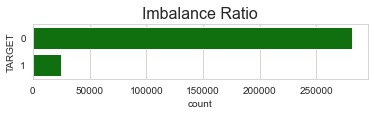

In [112]:
plt.figure(figsize=[6,1])
sns.set_style('whitegrid')
sns.countplot(data=appl_data, y='TARGET',color='green').set_title('Imbalance Ratio', fontsize=16)
plt.show()

### 2.7 Univariate Analysis

Here, we look at variables directly influencing the target.<br>
We use the term __**Target**__ for the target variable.<br>
We split the data into two datasets based on the Imbalance Ratio between the two types of applicants(Clients\*)
- __**Target 1:**__ __**`Defaulter Applicants`**__ -- (Clients\*) __**`with`**__ payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample.

- __**Target 0:**__ __**`Non-Defaulter Applicants`**__ (All other cases\*) __**`with no`**__ difficulties paying due on time

**As described in the columns_description.csv document*

#### 2.7.1 Reusable function for univariate analysis

In [113]:
def __Univariate(x):
    plt.figure(figsize=[12,6])
    sns.set_style('whitegrid')
    sns.countplot(data=appl_data,x=x,hue='TARGET')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {x} ',fontsize=25)
    plt.yscale('log')
    plt.xlabel(x,fontsize=20)
    plt.show()

#### 2.7.2 Gender vs Target

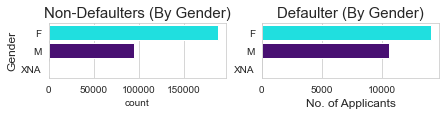

In [114]:
plt.figure(figsize=[7,1])
sns.set_style('whitegrid')
plt.ylabel('Gender', fontsize=10)

_gender_order = target0['CODE_GENDER'].value_counts().index

plt.subplot(1,2,1)
sns.countplot(data=target0, y='CODE_GENDER', order=_gender_order, palette=['cyan', 'Indigo'])\
        .set_title('Non-Defaulters (By Gender)', fontsize=15)
plt.ylabel('Gender', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(data=target1, y='CODE_GENDER', order=_gender_order, palette=['cyan', 'Indigo'])\
        .set_title('Defaulter (By Gender)', fontsize=15)
plt.ylabel('', fontsize=12)
#plt.xscale('log')

plt.xlabel('No. of Applicants',fontsize=12)

plt.show()

#### Observations
We generally notice that

- __**`Female`**__ applicants are higher than the __**Male**__ applicants and directly influences the numbers
- __**`Gender has No Impact on the Target`**__, other than the generic imbalance across the Defaulters and the Non-Defaulters.
- We will __**`Ignore Gender`**__ for all further analysis


#### 2.7.3 Income vs Target

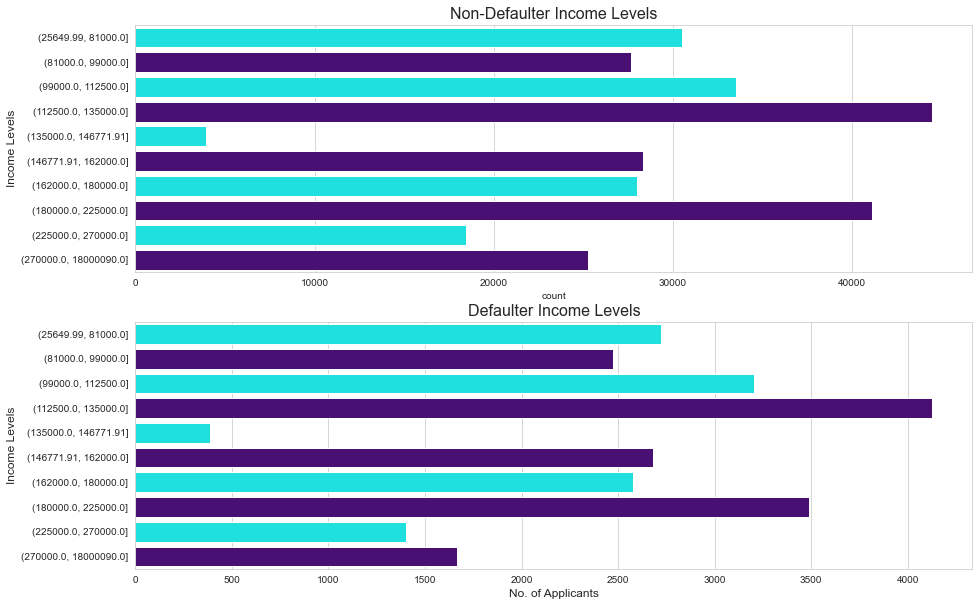

In [115]:
plt.figure(figsize=[15,10])
sns.set_style('whitegrid')

plt.subplot(2,1,1)
sns.countplot(data=target0, y='Income_Class', palette=['cyan', 'Indigo'])\
        .set_title('Non-Defaulter Income Levels', fontsize=16)
plt.ylabel('Income Levels', fontsize=12)

plt.subplot(2,1,2)
sns.countplot(data=target1, y='Income_Class', palette=['cyan', 'Indigo'])\
        .set_title('Defaulter Income Levels', fontsize=16)
plt.ylabel('Income Levels', fontsize=12)


plt.xlabel('No. of Applicants',fontsize=12)

plt.show()

In [116]:
income_levels_iv[4]

Interval(135000.0, 146771.91, closed='right')

In [117]:
appl_data['Income_Class'].value_counts()

(112500.0, 135000.0]      48598
(180000.0, 225000.0]      44577
(99000.0, 112500.0]       36694
(25649.99, 81000.0]       33211
(146771.91, 162000.0]     30991
(162000.0, 180000.0]      30560
(81000.0, 99000.0]        30101
(270000.0, 18000090.0]    26937
(225000.0, 270000.0]      19845
(135000.0, 146771.91]      4307
Name: Income_Class, dtype: int64

#### Observations

- The (135000.0, 146771.91) income level applicants seem to be __**`Very Less(Only **4307**)`**__ in number.
- __`**Regardless** Income Levels`__ different applicants face payment difficulties.
- No. of defaulters and non-defaulters seems to be proportionally __**`same`**__
- Considering the above observations, it seems like along with the income,<br>
there are other factors in play when it comes to the Target.
<br> We might require bi-variate or multi-variate analysis


#### 2.7.4 Annuity vs Target

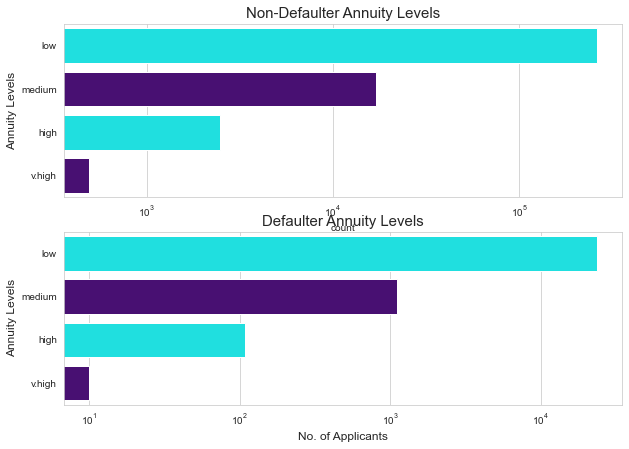

In [118]:
plt.figure(figsize=[10,7])
sns.set_style('whitegrid')

plt.subplot(2,1,1)
sns.countplot(data=target0, y='Annuity_Class', palette=['cyan', 'Indigo'])\
        .set_title('Non-Defaulter Annuity Levels', fontsize=15)
plt.ylabel('Annuity Levels', fontsize=12)
plt.xscale('log')

plt.subplot(2,1,2)
sns.countplot(data=target1, y='Annuity_Class', palette=['cyan', 'Indigo'])\
        .set_title('Defaulter Annuity Levels', fontsize=15)
plt.ylabel('Annuity Levels', fontsize=12)

plt.xscale('log')
plt.xlabel('No. of Applicants',fontsize=12)

plt.show()

#### 2.7.5 Family Size vs Target

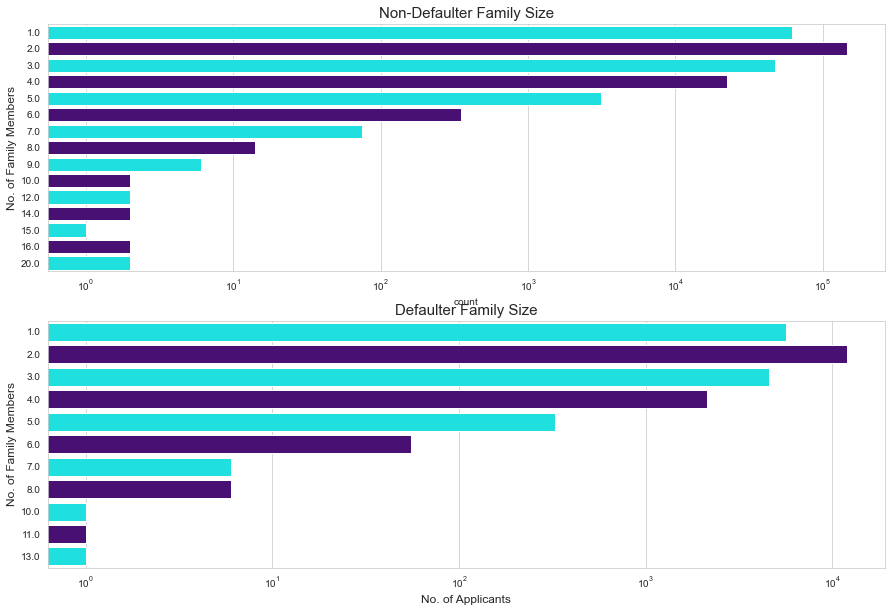

In [119]:
plt.figure(figsize=[15,10])
sns.set_style('whitegrid')

plt.subplot(2,1,1)
sns.countplot(data=target0, y='CNT_FAM_MEMBERS', palette=['cyan', 'Indigo'])\
        .set_title('Non-Defaulter Family Size', fontsize=15)
plt.ylabel('No. of Family Members', fontsize=12)
plt.xscale('log')

plt.subplot(2,1,2)
sns.countplot(data=target1, y='CNT_FAM_MEMBERS', palette=['cyan', 'Indigo'])\
        .set_title('Defaulter Family Size', fontsize=15)
plt.ylabel('No. of Family Members', fontsize=12)
plt.xscale('log')

plt.xlabel('No. of Applicants',fontsize=12)

plt.show()

In [120]:
target0['CNT_FAM_MEMBERS'].value_counts()

2.0     145548
1.0      61760
3.0      47741
4.0      22443
5.0       3135
6.0        352
7.0         75
8.0         14
9.0          6
12.0         2
20.0         2
10.0         2
16.0         2
14.0         2
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [121]:
target1['CNT_FAM_MEMBERS'].value_counts()

2.0     11971
1.0      5653
3.0      4587
4.0      2129
5.0       326
6.0        55
7.0         6
8.0         6
11.0        1
10.0        1
13.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

#### 2.7.6 Loan Type vs Target

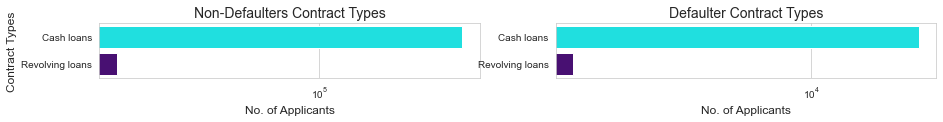

In [122]:
plt.figure(figsize=[15,1])

sns.set_style('whitegrid')

plt.subplot(1,2,1)
sns.countplot(data=target0,y='NAME_CONTRACT_TYPE', palette=['cyan','Indigo'])\
    .set_title('Non-Defaulters Contract Types', fontsize=14)
plt.ylabel('Contract Types', fontsize=12)
plt.xlabel('No. of Applicants',fontsize=12)
plt.xscale('log')

plt.subplot(1,2,2)
sns.countplot(data=target1,y='NAME_CONTRACT_TYPE', palette=['cyan','Indigo'])\
    .set_title('Defaulter Contract Types', fontsize=14)

plt.ylabel('', fontsize=12)
plt.xscale('log')
plt.xlabel('No. of Applicants',fontsize=12)

plt.show()

#### 2.7.7 Organization Type vs Target

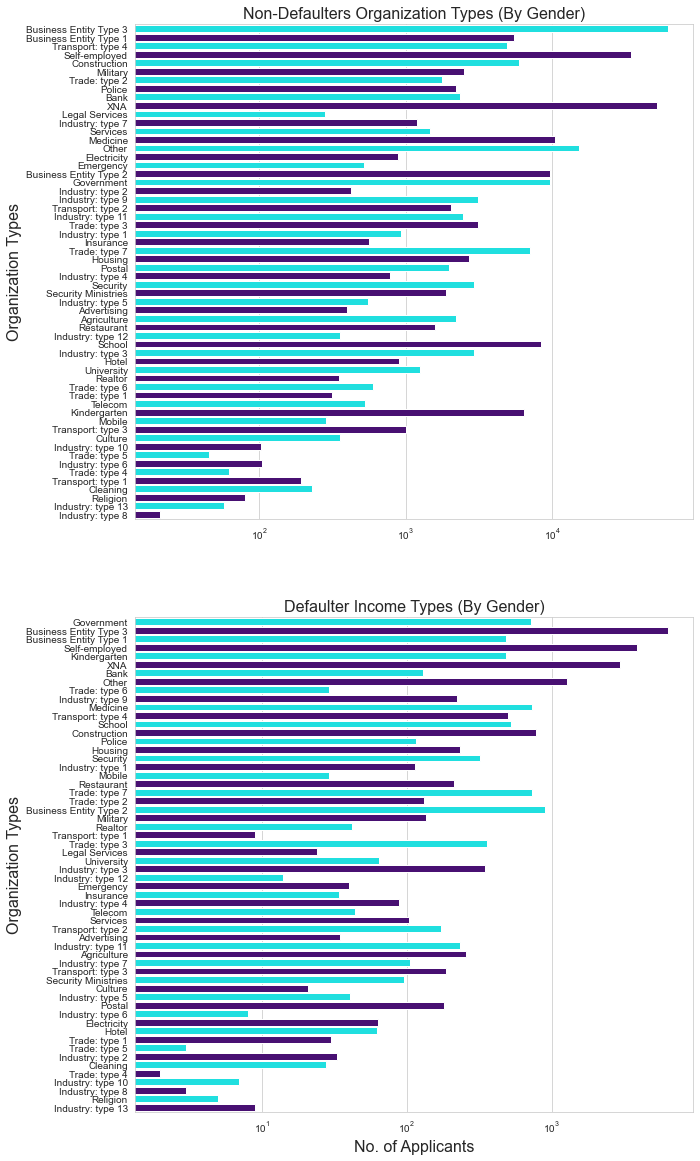

In [123]:
plt.figure(figsize=[10,20])
sns.set_style('whitegrid')

plt.subplot(2,1,1)
sns.countplot(data=target0,y='ORGANIZATION_TYPE', palette=['cyan','Indigo'])\
    .set_title('Non-Defaulters Organization Types (By Gender)', fontsize=16)
plt.ylabel('Organization Types', fontsize=16)
plt.xlabel(' ',fontsize=12)
plt.xscale('log')

plt.subplot(2,1,2)
sns.countplot(data=target1,y='ORGANIZATION_TYPE', palette=['cyan','Indigo'])\
    .set_title('Defaulter Income Types (By Gender)', fontsize=16)

plt.ylabel('Organization Types', fontsize=16)
plt.xscale('log')

plt.xlabel('No. of Applicants',fontsize=16)

plt.show()

#### 2.7.8 Observations so far:

- Interestingy, All important social variables so far seem not to individually effecting on the Target.
- Let's run them for rest of the columns.
- Considering the above observations, it seems like along with the income, there are other factors in play when it comes to the Target. We might require bi-variate or multi-variate analysis


#### 2.7.9 Running Univariate Analysis for all to assert the above

In [124]:
def Univariate(x):
    plt.figure(figsize=[10,4])
    sns.set_style('whitegrid')
    
    sns.countplot(data=appl_data, y=x, hue='TARGET', palette='muted')        
    
    plt.title(f'{x} vs Target', fontsize=15)
    plt.xlabel('No. of Applicants', fontsize=12)
    
    plt.xscale('log')
    plt.show()

In [125]:
colns=['INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','OCCUPATION_TYPE']

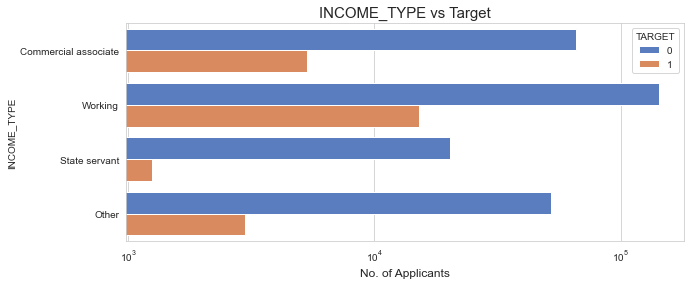

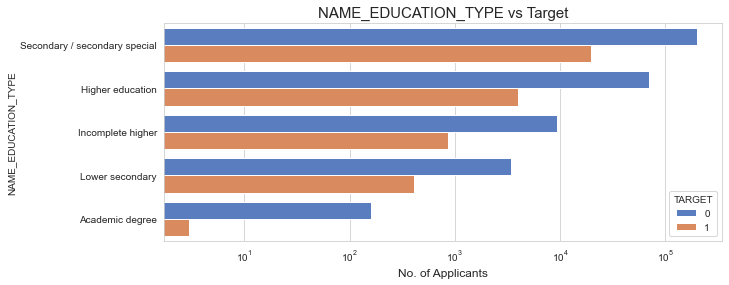

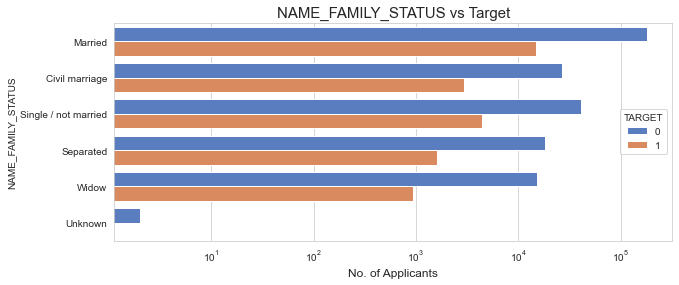

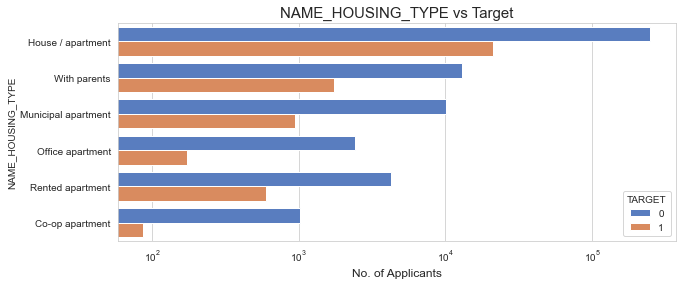

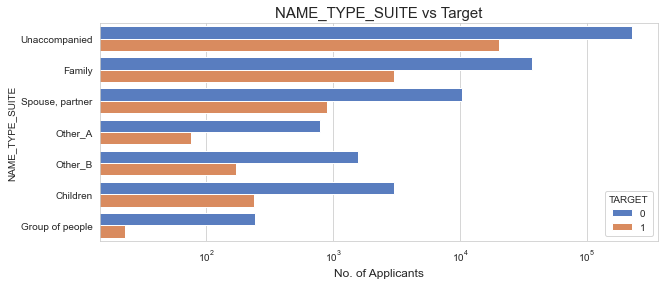

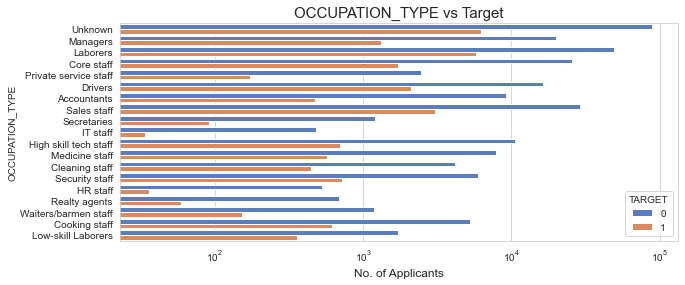

In [126]:
for x in colns:
    Univariate(x)

### 2.7.10 Observations for Univariate Analysis:

- All important social variables are __**`not individually effecting`**__ on the Target.
- There are other factors in play when it comes to the Target.
- We require __**`bi-variate or multi-variate analysis`**__


## 2.8 Multivariate Analysis

### 2.8.1 Bi-Variate Analysis: Heatmap for different categories for both the targets

In [127]:
def analyse(x,y):
    corr0=pd.pivot_table(data=target0,values='TARGET',index=[x],columns=[y],aggfunc='count')
    corr1=pd.pivot_table(data=target1,values='TARGET',index=[x],columns=[y],aggfunc='count')
        
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)

    sns.heatmap(corr0, cmap='Greens')
    plt.xlabel(f'Target0 - {x}')
    ax = plt.subplot(1,2,2)

    sns.heatmap(corr1,cmap='Blues')
    plt.xlabel(f'Target1 - {x}')
    plt.ylabel('')
    ax.set_yticklabels([])

    plt.show()

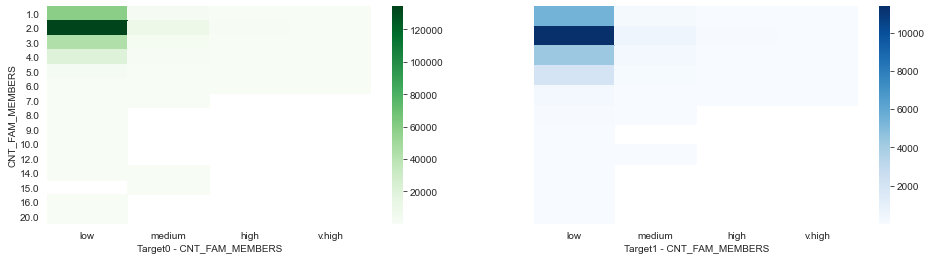

In [128]:
analyse('CNT_FAM_MEMBERS', 'Annuity_Class')

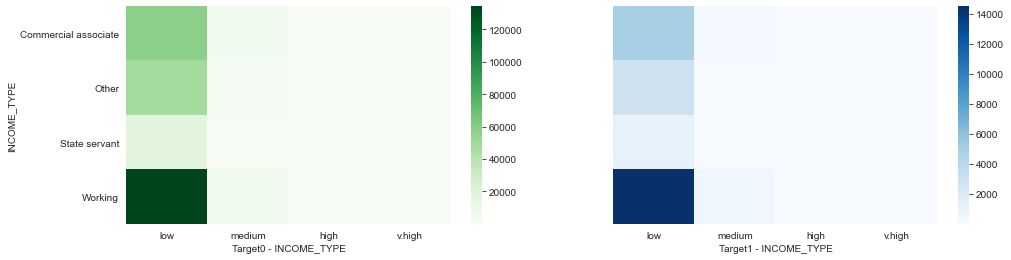

In [129]:
analyse('INCOME_TYPE', 'Annuity_Class')

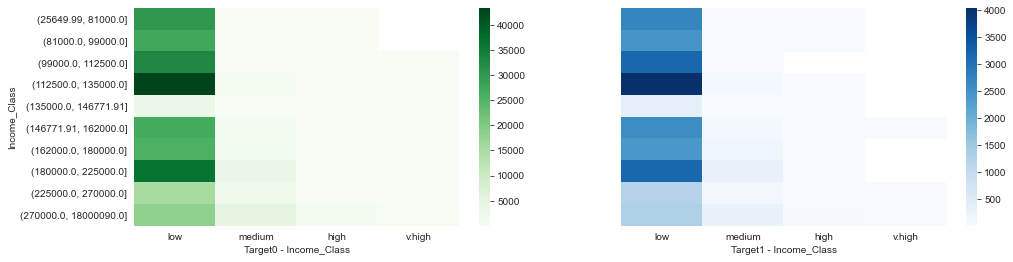

In [130]:
analyse('Income_Class', 'Annuity_Class')

#### Observations for Multivariate Analysis:

- No significance variations were observed for specific variables.
- This calls for multi-variate analysis
- Cross-referencing with Previous Application data could potentially yield more results

### 2.8.2 Multivariate Analysis: Correlation

In [131]:
corr0=target0.iloc[0:,2:].corr()
heatmap_corr0 = corr0.copy()
corr0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
CNT_CHILDREN,1.000000,0.027992,0.003286,0.021290,-0.000469,-0.024171,NaN,0.244188,0.055332,-0.001356,...,-0.041566,0.014528,-0.002158,0.014203,-0.002126,-0.337254,-0.245092,-0.185701,0.028661,0.008425
AMT_INCOME_TOTAL,0.027992,1.000000,0.342454,0.418268,0.348698,0.166220,NaN,0.141555,-0.031791,-0.018535,...,-0.073621,-0.027929,-0.027620,-0.027793,-0.027619,-0.063089,-0.141203,-0.065049,-0.023179,0.042493
AMT_CREDIT,0.003286,0.342454,1.000000,0.770579,0.986965,0.100946,NaN,0.071760,-0.017799,0.023486,...,0.035939,-0.001014,-0.019927,-0.000992,-0.022320,0.047306,-0.070606,-0.013241,0.001063,0.068400
AMT_ANNUITY,0.021290,0.418268,0.770579,1.000000,0.775859,0.121195,NaN,0.106431,-0.023008,0.021946,...,0.027746,-0.013176,-0.022593,-0.012981,-0.023447,-0.012606,-0.105764,-0.039315,-0.014466,0.062069
AMT_GOODS_PRICE,-0.000469,0.348698,0.986965,0.775859,1.000000,0.104015,NaN,0.069835,0.002785,0.020566,...,0.038875,-0.000700,-0.021032,-0.000717,-0.023216,0.045068,-0.068675,-0.015546,0.003439,0.070325
REGION_POPULATION_RELATIVE,-0.024171,0.166220,0.100946,0.121195,0.104015,1.000000,NaN,0.007269,-0.013614,-0.012521,...,-0.012983,-0.012139,0.005959,-0.011627,0.002261,0.025318,-0.007374,0.052269,0.001059,0.041983
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_EMP_PHONE,0.244188,0.141555,0.071760,0.106431,0.069835,0.007269,NaN,1.000000,0.235880,-0.013526,...,-0.110505,-0.007203,-0.019142,-0.007374,-0.016323,-0.621970,-0.999755,-0.212188,-0.274528,0.025627
FLAG_WORK_PHONE,0.055332,-0.031791,-0.017799,-0.023008,0.002785,-0.013614,NaN,0.235880,1.000000,0.021323,...,-0.058789,-0.011761,-0.008447,-0.012009,-0.008282,-0.172740,-0.235715,-0.057926,-0.046574,0.042376
FLAG_CONT_MOBILE,-0.001356,-0.018535,0.023486,0.021946,0.020566,-0.012521,NaN,-0.013526,0.021323,1.000000,...,0.012143,0.003127,0.005551,0.003233,0.006136,0.015348,0.013586,0.004335,0.001754,0.028781


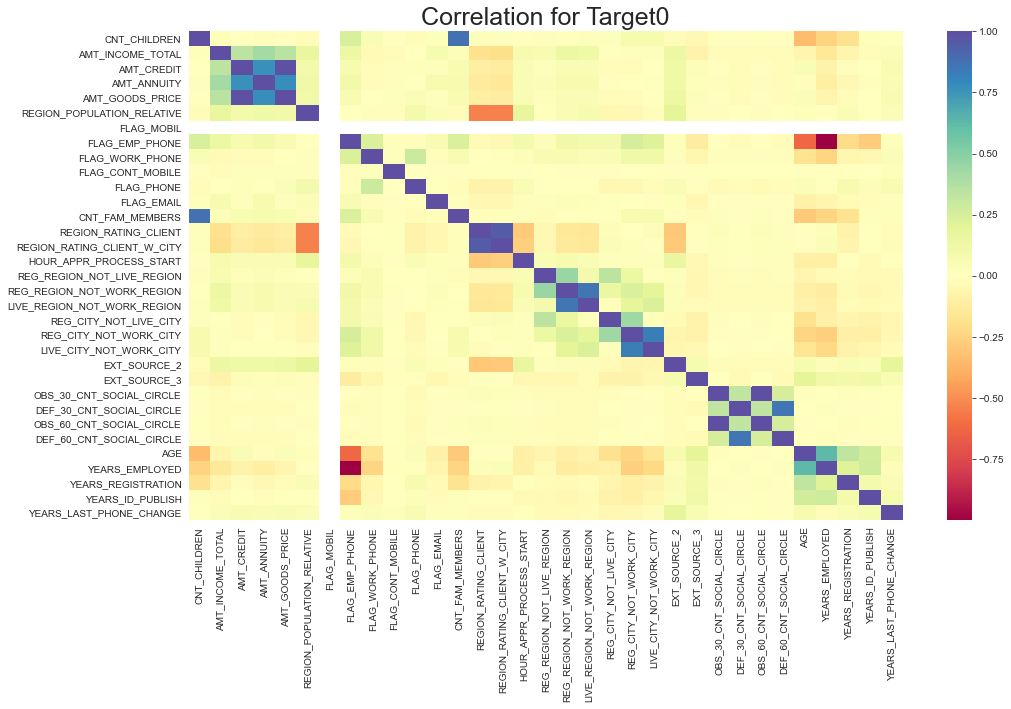

In [132]:
plt.figure(figsize=[16,9])
sns.heatmap(heatmap_corr0, cmap='Spectral')
plt.title("Correlation for Target0",fontsize=25)
plt.show()

In [133]:
corr1=target1.iloc[0:,2:].corr()
heatmap_corr1 = corr1.copy()
corr1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
CNT_CHILDREN,1.000000,0.002735,-0.002009,0.030826,-0.008419,-0.032140,NaN,0.192442,0.051446,0.003596,...,-0.020244,0.025718,0.001647,0.025091,-0.004703,-0.258924,-0.192836,-0.149065,0.033540,-0.012451
AMT_INCOME_TOTAL,0.002735,1.000000,0.324956,0.397928,0.327434,0.117307,NaN,0.107672,-0.074123,-0.009768,...,-0.061981,-0.006558,-0.024705,-0.005862,-0.024381,0.002472,-0.107321,-0.038559,0.003478,0.076472
AMT_CREDIT,-0.002009,0.324956,1.000000,0.751707,0.982846,0.069764,NaN,-0.001221,-0.060478,0.031903,...,0.078405,0.019218,-0.026280,0.019606,-0.031081,0.135758,0.002492,0.026374,0.052156,0.108875
AMT_ANNUITY,0.030826,0.397928,0.751707,1.000000,0.752511,0.072334,NaN,0.081315,-0.050918,0.035833,...,0.042357,0.004447,-0.022717,0.005479,-0.027798,0.014412,-0.080725,-0.033585,0.016262,0.079614
AMT_GOODS_PRICE,-0.008419,0.327434,0.982846,0.752511,1.000000,0.076864,NaN,-0.005860,-0.035903,0.028688,...,0.079518,0.019872,-0.022243,0.020437,-0.026598,0.135844,0.007230,0.026028,0.055779,0.115704
REGION_POPULATION_RELATIVE,-0.032140,0.117307,0.069764,0.072334,0.076864,1.000000,NaN,-0.015833,-0.018053,-0.004058,...,-0.009378,0.006528,0.026134,0.007082,0.018515,0.048790,0.015961,0.056455,0.016646,0.053530
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_EMP_PHONE,0.192442,0.107672,-0.001221,0.081315,-0.005860,-0.015833,NaN,1.000000,0.206831,-0.009959,...,-0.094710,0.008055,-0.003568,0.008349,-0.005674,-0.578525,-0.999704,-0.190575,-0.227100,0.000467
FLAG_WORK_PHONE,0.051446,-0.074123,-0.060478,-0.050918,-0.035903,-0.018053,NaN,0.206831,1.000000,0.023872,...,-0.070881,-0.023127,-0.013332,-0.022880,-0.008301,-0.155210,-0.206396,-0.049437,-0.024328,0.040971
FLAG_CONT_MOBILE,0.003596,-0.009768,0.031903,0.035833,0.028688,-0.004058,NaN,-0.009959,0.023872,1.000000,...,0.017527,0.001727,-0.002512,0.001409,-0.003950,0.011731,0.010016,-0.002722,-0.007119,0.026118


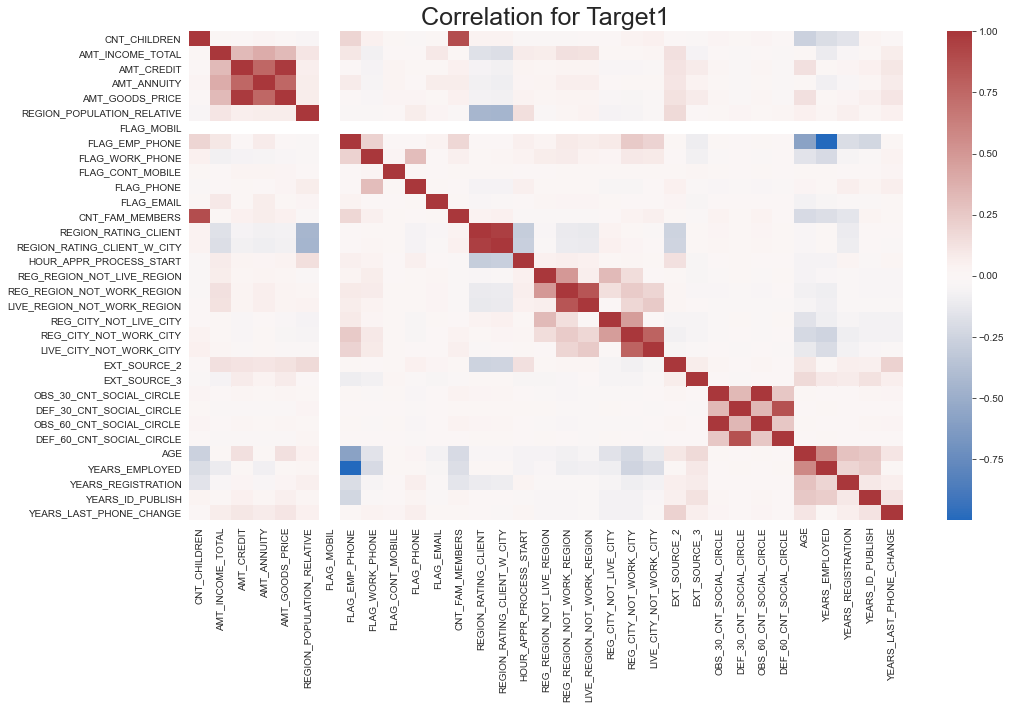

In [134]:
plt.figure(figsize=[16,9])
sns.heatmap(heatmap_corr1, cmap='vlag')
plt.title("Correlation for Target1",fontsize=25)
plt.show()

In [135]:
## correlation between columns by observations
def correlation(x,y):
    plt.figure(figsize=[20,10])
    ax = plt.subplot(1,2,1)
    sns.scatterplot(target0[x],target0[y])
    plt.title(f'{x} VS {y} for Target 0',fontsize=20)

    plt.xlabel(f'{x}')
    ax.xaxis.get_label().set_fontsize(18)
    plt.ylabel(f'{y}')

    ax = plt.subplot(1,2,2)
    sns.scatterplot(target1[x],target1[y])
    plt.title(f'{x} VS {y} for Target 1',fontsize=20)

    plt.xlabel(f'{x}')
    ax.xaxis.get_label().set_fontsize(18)
    plt.ylabel(f'{y}')
    plt.show()

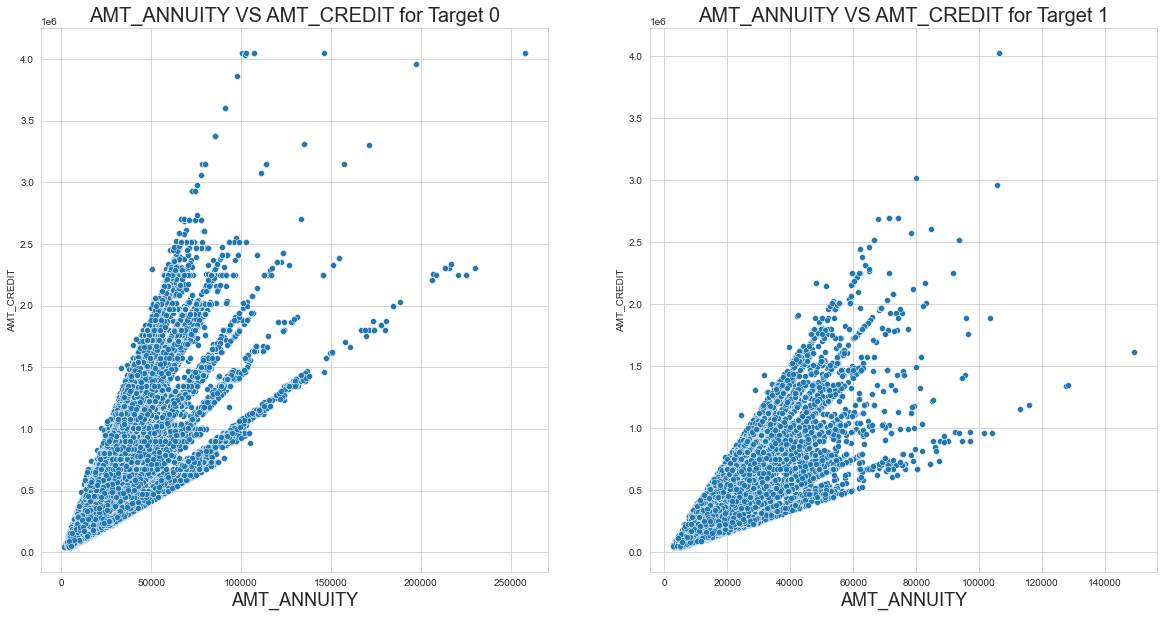

In [136]:
correlation('AMT_ANNUITY','AMT_CREDIT')

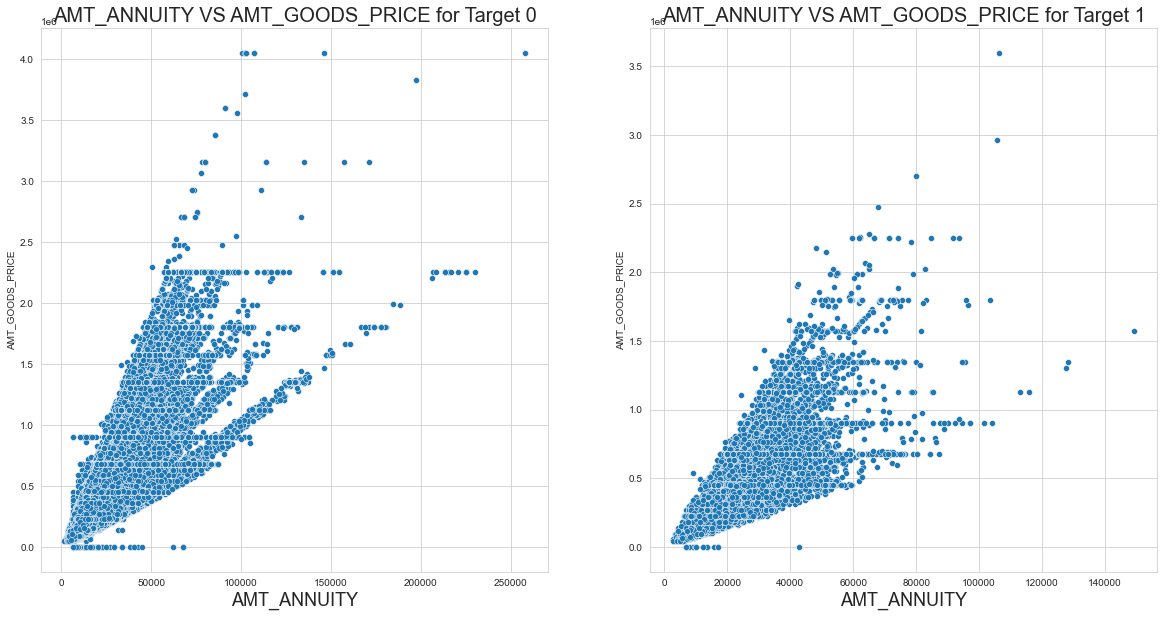

In [137]:
correlation('AMT_ANNUITY','AMT_GOODS_PRICE')

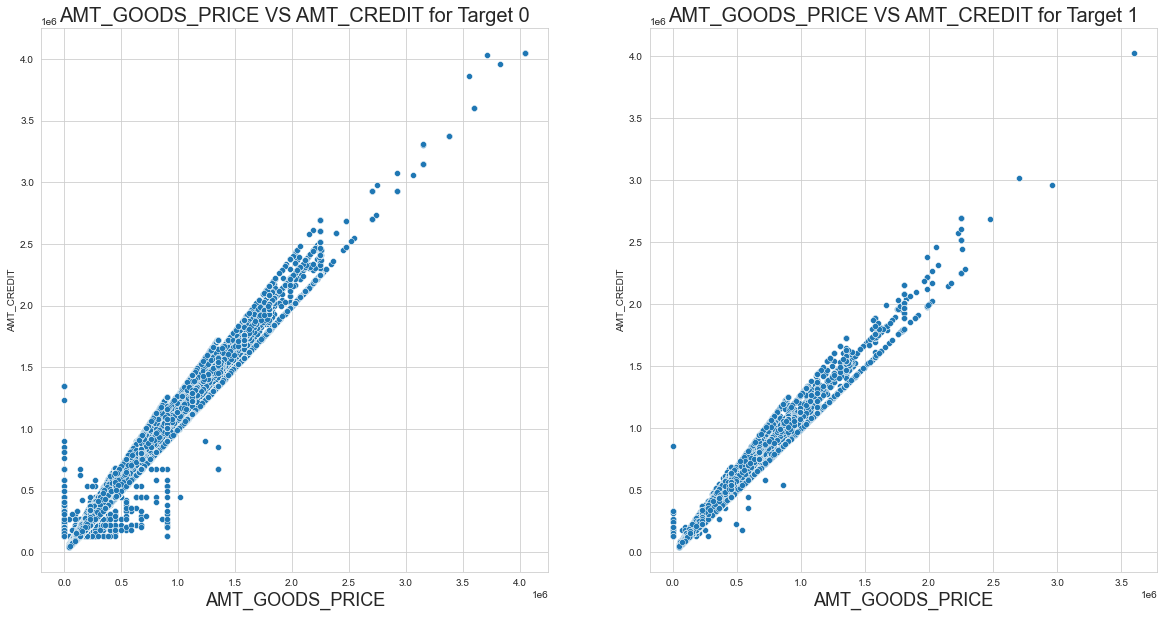

In [138]:
correlation('AMT_GOODS_PRICE','AMT_CREDIT')

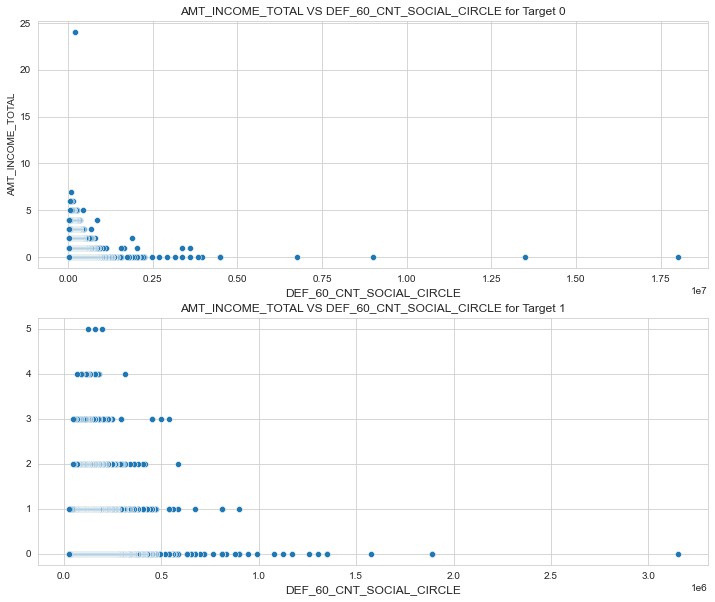

In [139]:
plt.figure(figsize=[12,10])
ax = plt.subplot(2,1,1)
sns.scatterplot(target0.AMT_INCOME_TOTAL,target0.DEF_60_CNT_SOCIAL_CIRCLE)
plt.title('AMT_INCOME_TOTAL VS DEF_60_CNT_SOCIAL_CIRCLE for Target 0',fontsize=12)

plt.xlabel('DEF_60_CNT_SOCIAL_CIRCLE')
ax.xaxis.get_label().set_fontsize(12)
plt.ylabel('AMT_INCOME_TOTAL')

ax = plt.subplot(2,1,2)
sns.scatterplot(target1.AMT_INCOME_TOTAL,target1.DEF_60_CNT_SOCIAL_CIRCLE)
plt.title('AMT_INCOME_TOTAL VS DEF_60_CNT_SOCIAL_CIRCLE for Target 1',fontsize=12)

plt.xlabel('DEF_60_CNT_SOCIAL_CIRCLE')
ax.xaxis.get_label().set_fontsize(12)
plt.ylabel('')
plt.show()

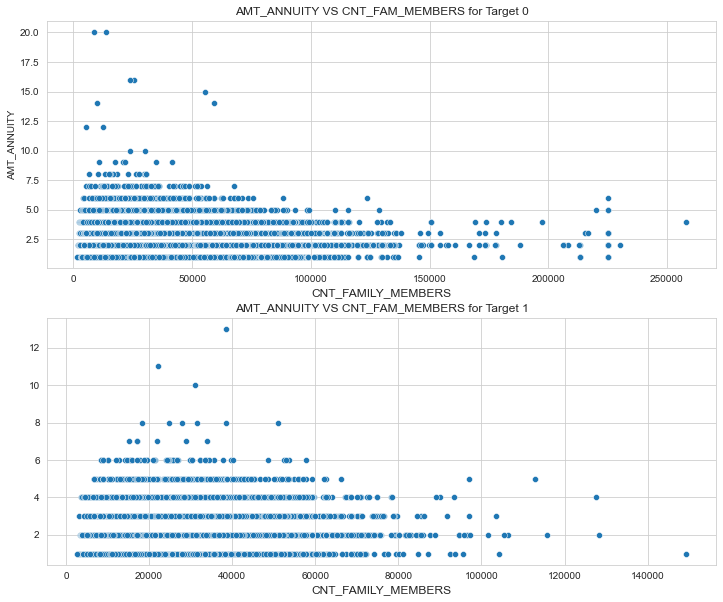

In [140]:
plt.figure(figsize=[12,10])
ax = plt.subplot(2,1,1)
sns.scatterplot(target0.AMT_ANNUITY,target0.CNT_FAM_MEMBERS)
plt.title('AMT_ANNUITY VS CNT_FAM_MEMBERS for Target 0',fontsize=12)

plt.xlabel('CNT_FAMILY_MEMBERS')
ax.xaxis.get_label().set_fontsize(12)
plt.ylabel('AMT_ANNUITY')

ax = plt.subplot(2,1,2)
sns.scatterplot(target1.AMT_ANNUITY,target1.CNT_FAM_MEMBERS)
plt.title('AMT_ANNUITY VS CNT_FAM_MEMBERS for Target 1',fontsize=12)

plt.xlabel('CNT_FAMILY_MEMBERS')
ax.xaxis.get_label().set_fontsize(12)
plt.ylabel('')
plt.show()

### Finding top10 correlations for target0 and target1

In [141]:
target_corr0=corr0=corr0.abs().unstack().sort_values().dropna()
target_corr0=target_corr0[target_corr0!=1.0]
target_corr0

FLAG_PHONE                EXT_SOURCE_3                0.000002
EXT_SOURCE_3              FLAG_PHONE                  0.000002
YEARS_LAST_PHONE_CHANGE   DEF_60_CNT_SOCIAL_CIRCLE    0.000032
DEF_60_CNT_SOCIAL_CIRCLE  YEARS_LAST_PHONE_CHANGE     0.000032
REG_CITY_NOT_WORK_CITY    DEF_30_CNT_SOCIAL_CIRCLE    0.000386
                                                        ...   
AMT_CREDIT                AMT_GOODS_PRICE             0.986965
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998511
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998511
FLAG_EMP_PHONE            YEARS_EMPLOYED              0.999755
YEARS_EMPLOYED            FLAG_EMP_PHONE              0.999755
Length: 992, dtype: float64

In [142]:
# Top 10 correlation for target0
## As observed we can see our estimated variables are under top10 correlated variables
target_corr0.tail(10)

CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878663
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878663
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.949976
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.949976
AMT_GOODS_PRICE              AMT_CREDIT                     0.986965
AMT_CREDIT                   AMT_GOODS_PRICE                0.986965
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998511
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998511
FLAG_EMP_PHONE               YEARS_EMPLOYED                 0.999755
YEARS_EMPLOYED               FLAG_EMP_PHONE                 0.999755
dtype: float64

In [143]:

target_corr1=corr1=corr1.abs().unstack().sort_values().dropna()
target_corr1=target_corr1[target_corr1!=1.0]
target_corr1

REGION_RATING_CLIENT_W_CITY  YEARS_ID_PUBLISH               0.000105
YEARS_ID_PUBLISH             REGION_RATING_CLIENT_W_CITY    0.000105
DEF_30_CNT_SOCIAL_CIRCLE     YEARS_LAST_PHONE_CHANGE        0.000213
YEARS_LAST_PHONE_CHANGE      DEF_30_CNT_SOCIAL_CIRCLE       0.000213
FLAG_EMP_PHONE               EXT_SOURCE_2                   0.000331
                                                              ...   
AMT_GOODS_PRICE              AMT_CREDIT                     0.982846
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998272
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998272
YEARS_EMPLOYED               FLAG_EMP_PHONE                 0.999704
FLAG_EMP_PHONE               YEARS_EMPLOYED                 0.999704
Length: 992, dtype: float64

In [144]:
# Top 10 correlation for target1
## As observed we can see our estimated variables are under top10 correlated variables
target_corr1.tail(10)

CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885495
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885495
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956560
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956560
AMT_CREDIT                   AMT_GOODS_PRICE                0.982846
AMT_GOODS_PRICE              AMT_CREDIT                     0.982846
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998272
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998272
YEARS_EMPLOYED               FLAG_EMP_PHONE                 0.999704
FLAG_EMP_PHONE               YEARS_EMPLOYED                 0.999704
dtype: float64

## Bivariate Analysis

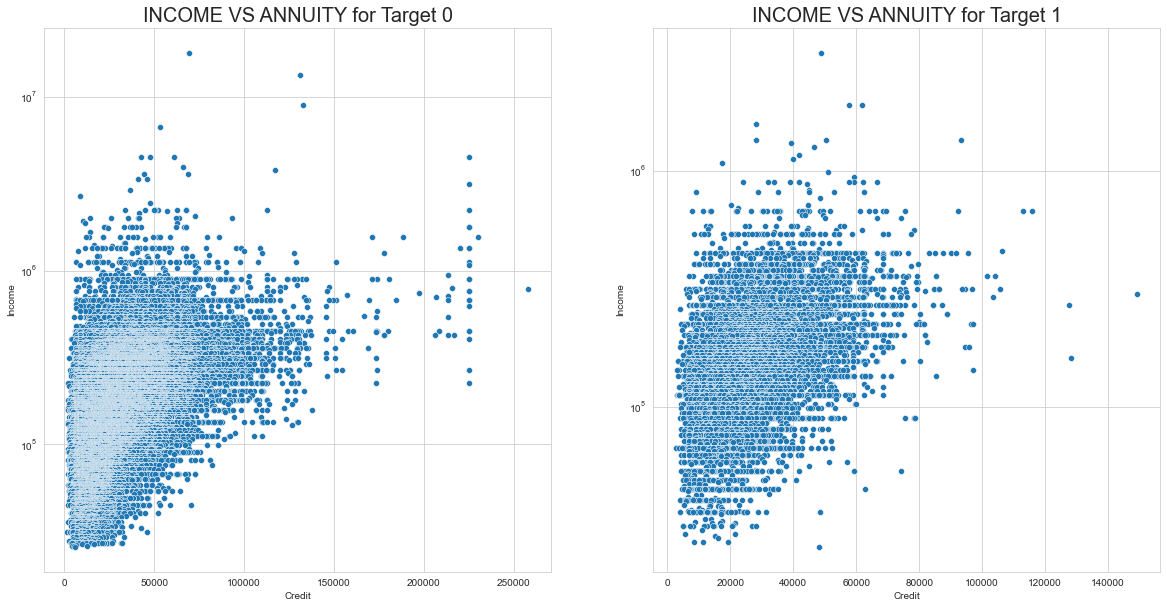

In [145]:
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
sns.scatterplot(target0.AMT_ANNUITY,target0.AMT_INCOME_TOTAL)
plt.title('INCOME VS ANNUITY for Target 0',fontsize=20)
plt.yscale('log')
plt.xlabel('Credit')
plt.ylabel('Income')

plt.subplot(1,2,2)
sns.scatterplot(target1.AMT_ANNUITY,target1.AMT_INCOME_TOTAL)
plt.title('INCOME VS ANNUITY for Target 1',fontsize=20)
plt.yscale('log')
plt.xlabel('Credit')
plt.ylabel('Income')
plt.show()

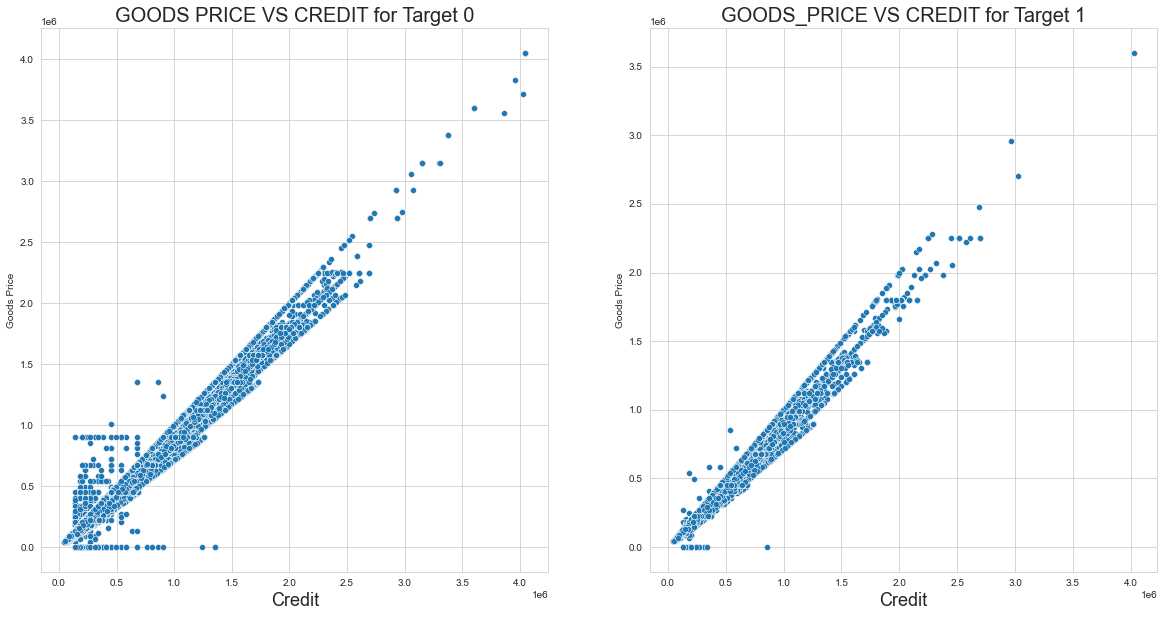

In [146]:
plt.figure(figsize=[20,10])
ax = plt.subplot(1,2,1)
sns.scatterplot(target0.AMT_CREDIT,target0.AMT_GOODS_PRICE)
plt.title('GOODS PRICE VS CREDIT for Target 0',fontsize=20)

plt.xlabel('Credit')
ax.xaxis.get_label().set_fontsize(18)
plt.ylabel('Goods Price')

ax = plt.subplot(1,2,2)
sns.scatterplot(target1.AMT_CREDIT,target1.AMT_GOODS_PRICE)
plt.title('GOODS_PRICE VS CREDIT for Target 1',fontsize=20)

plt.xlabel('Credit')
ax.xaxis.get_label().set_fontsize(18)
plt.ylabel('Goods Price')
plt.show()

### Goods_price and Credit are highly correlated

## Previous application data

In [147]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
pd.set_option('display.max_rows', prev_data.shape[1])
prev_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


In [149]:
perc_missing = round(prev_data.isna().sum() / prev_data.shape[0], 2)

#number of columns with no missing values
perc_missing[perc_missing == 0].size

23

In [150]:
#number of columns with missing values
perc_missing[perc_missing != 0].size

14

In [151]:
perc_missing[perc_missing>0.5]

AMT_DOWN_PAYMENT            0.54
RATE_DOWN_PAYMENT           0.54
RATE_INTEREST_PRIMARY       1.00
RATE_INTEREST_PRIVILEGED    1.00
dtype: float64

In [152]:
# As there are morethan 50% missing values in AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT 
# We cannot use these colns for analysis

In [153]:
prev_data['SK_ID_CURR'].value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

In [154]:
## Few appl numbers are repeated --> Assuming them as fraud

In [155]:
fraud_id=(prev_data['SK_ID_CURR'].value_counts()!=1).index

In [156]:
valid_appl=appl_data[~appl_data['SK_ID_CURR'].isin (fraud_id)]

In [157]:
fraud_appl=appl_data[appl_data['SK_ID_CURR'].isin(fraud_id)]

<AxesSubplot:xlabel='TARGET', ylabel='count'>

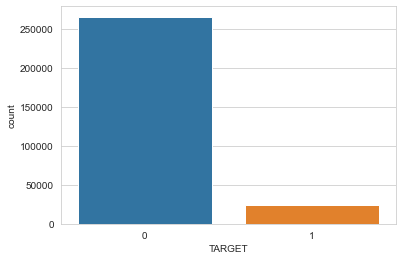

In [158]:
sns.countplot(fraud_appl['TARGET'])

In [159]:
# We can observe that many fraud applications are treated as defaulter

<AxesSubplot:xlabel='TARGET', ylabel='count'>

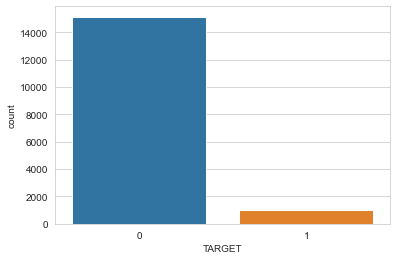

In [160]:
sns.countplot(valid_appl['TARGET'])

In [161]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [162]:
join_data = appl_data.join(prev_data, on='SK_ID_CURR', how='inner', lsuffix='_curr', rsuffix='_prev')

In [163]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305821 entries, 203693 to 1678
Data columns (total 88 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   SK_ID_CURR                       305821 non-null  int64   
 1   SK_ID_CURR_curr                  305821 non-null  int64   
 2   TARGET                           305821 non-null  int64   
 3   NAME_CONTRACT_TYPE_curr          305821 non-null  object  
 4   CODE_GENDER                      305821 non-null  object  
 5   FLAG_OWN_CAR                     305821 non-null  object  
 6   FLAG_OWN_REALTY                  305821 non-null  object  
 7   CNT_CHILDREN                     305821 non-null  int64   
 8   AMT_INCOME_TOTAL                 305821 non-null  float64 
 9   AMT_CREDIT_curr                  305821 non-null  float64 
 10  AMT_ANNUITY_curr                 305821 non-null  float64 
 11  AMT_GOODS_PRICE_curr             305821 non-null 

In [164]:
join_data.loc[join_data['TARGET'] > 0]

,SK_ID_CURR,SK_ID_CURR_curr,TARGET,NAME_CONTRACT_TYPE_curr,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_curr,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
248159,387126,387126,1,Cash loans,F,Y,Y,1,3150000.0,900000.0,...,XNA,24.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
248970,388040,388040,1,Cash loans,M,Y,Y,0,1890000.0,900000.0,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
41725,148308,148308,1,Cash loans,M,Y,Y,1,1890000.0,781920.0,...,Connectivity,4.0,high,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
167656,294352,294352,1,Cash loans,F,N,Y,0,1575000.0,553806.0,...,Furniture,12.0,middle,POS industry with interest,365243.0,365243.0,335.0,365243.0,365243.0,0.0
196106,327395,327395,1,Cash loans,F,Y,N,2,1350000.0,2517300.0,...,XNA,60.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86070,199880,199880,1,Cash loans,F,Y,N,2,27900.0,343800.0,...,XNA,24.0,low_normal,Cash X-Sell: low,365243.0,-325.0,365.0,-295.0,-291.0,1.0
111197,229012,229012,1,Cash loans,F,N,N,0,27000.0,215640.0,...,XNA,12.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
76778,189037,189037,1,Cash loans,F,N,N,0,27000.0,225000.0,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-240.0,1170.0,365243.0,365243.0,1.0
18548,121642,121642,1,Cash loans,F,N,N,0,27000.0,225000.0,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
fil = join_data.loc[join_data['TARGET'] > 0]['SK_ID_CURR'].value_counts()
fil.sum()

24736

In [166]:
## We can observe that few applications which are repeated in previous data are not present in application data
join_data['SK_ID_CURR_prev'].value_counts()

265681    21
110899    16
206783    16
173680    15
206862    15
          ..
345643     1
368176     1
366129     1
362035     1
278507     1
Name: SK_ID_CURR_prev, Length: 180724, dtype: int64

In [167]:
prev_data['SK_ID_CURR'].value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

In [168]:
join_data[['SK_ID_CURR', 'TARGET', 'CODE_REJECT_REASON']]

,SK_ID_CURR,TARGET,CODE_REJECT_REASON
203693,336147,0,HC
246858,385674,0,LIMIT
77768,190160,0,XAP
131127,252084,0,XAP
287463,432980,0,XAP
...,...,...,...
240137,378118,0,XAP
246104,384810,0,XAP
186643,316377,0,XAP
20727,124157,1,XAP


In [169]:
join_data[['SK_ID_CURR', 'TARGET', 'CODE_REJECT_REASON']].loc[join_data['TARGET'] > 0]

,SK_ID_CURR,TARGET,CODE_REJECT_REASON
248159,387126,1,XAP
248970,388040,1,XAP
41725,148308,1,SCO
167656,294352,1,XAP
196106,327395,1,XAP
...,...,...,...
86070,199880,1,XAP
111197,229012,1,HC
76778,189037,1,XAP
18548,121642,1,XAP


<AxesSubplot:xlabel='CODE_REJECT_REASON', ylabel='count'>

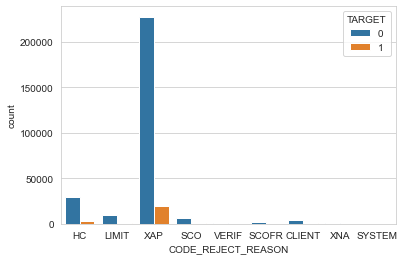

In [170]:
sns.countplot(data=join_data[['TARGET','CODE_REJECT_REASON']],x='CODE_REJECT_REASON',hue='TARGET')

In [171]:
join_data['DAYS_DECISION']

203693    -220
246858    -656
77768     -792
131127   -1070
287463   -1197
          ... 
240137    -734
246104    -270
186643    -642
20727     -579
1678      -324
Name: DAYS_DECISION, Length: 305821, dtype: int64

In [172]:
join_data['DAYS_DECISION']=abs(join_data['DAYS_DECISION'])

In [173]:
join_data['DAYS']=pd.qcut(join_data['DAYS_DECISION'],q=10)

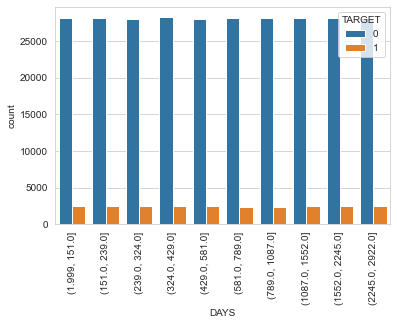

In [174]:
sns.countplot(data=join_data[['TARGET','DAYS']],x='DAYS',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

In [175]:
## Days to process the defaulters application is more compared to non defaulters

In [176]:
join_data[['SK_ID_CURR','DAYS_DECISION']].loc[join_data['TARGET']==1].sort_values(by='DAYS_DECISION')

,SK_ID_CURR,DAYS_DECISION
229124,365383,2
35106,140667,2
87434,201476,2
85711,199463,2
170065,297103,2
...,...,...
291088,437210,2921
199478,331259,2922
293786,440369,2922
193764,324690,2922


In [177]:
join_data[['SK_ID_CURR','DAYS_DECISION']].loc[join_data['TARGET']==0].sort_values(by='DAYS_DECISION')

,SK_ID_CURR,DAYS_DECISION
22839,126576,2
292252,438560,2
278341,422476,2
219630,354440,2
87937,202087,2
...,...,...
34160,139586,2922
135141,256734,2922
115640,234100,2922
184510,313869,2922


## Notes on Analysis

- EDA for Cross-referenced dataset is incomplete
- Pre-liminary analysis indicate that:
  Some applicants are having multiple previous applications
  There are more relevant business information like CODE_REJECT_REASON which means a direct impact on the Target variable.
 Previous Applications dataset has more than double the number of records across both the Target segments.

- __**`Further EDA will be required`**_  for a more decisive identification of influential variables.
